<a href="https://colab.research.google.com/github/Lulekwa/Deep-Learning/blob/main/Telco_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

/tmp/ipython-input-3339150399.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


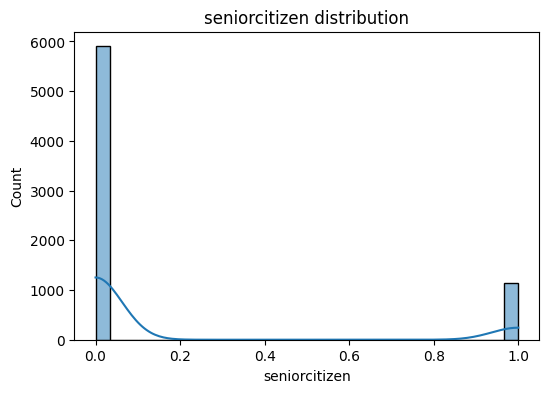

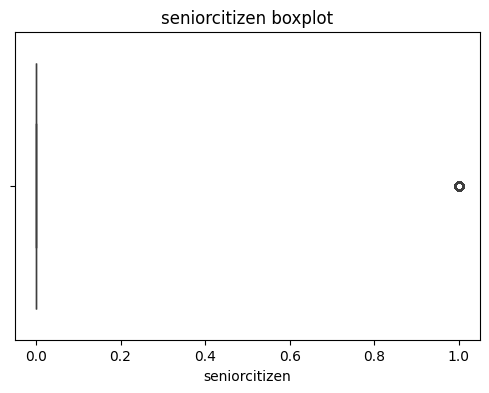

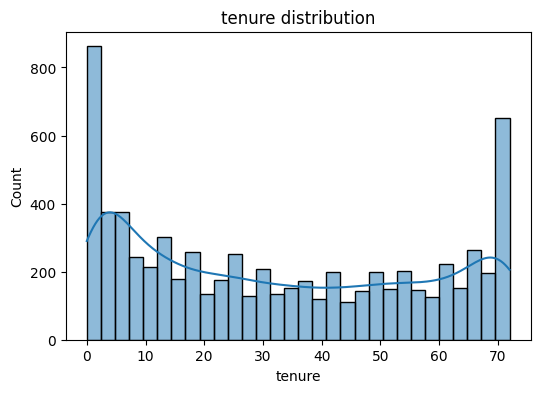

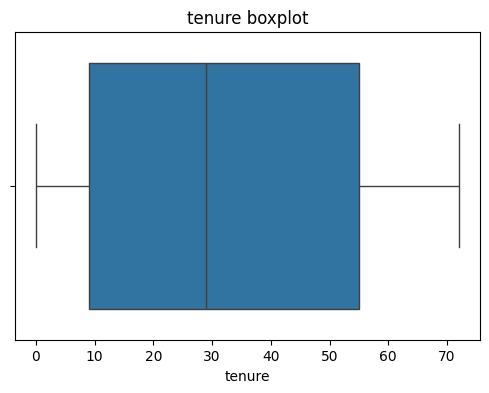

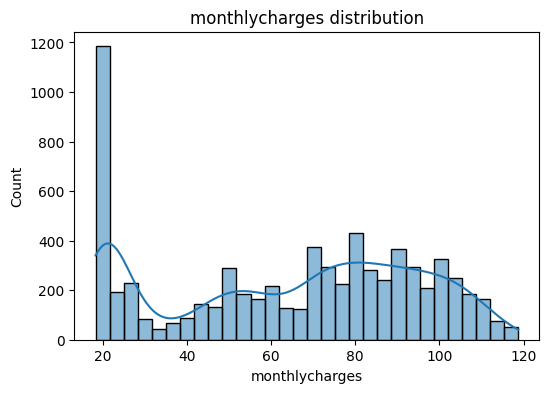

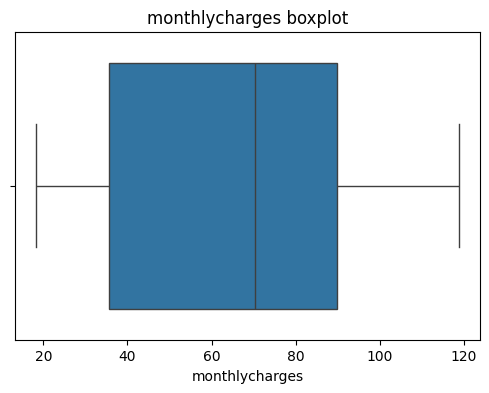

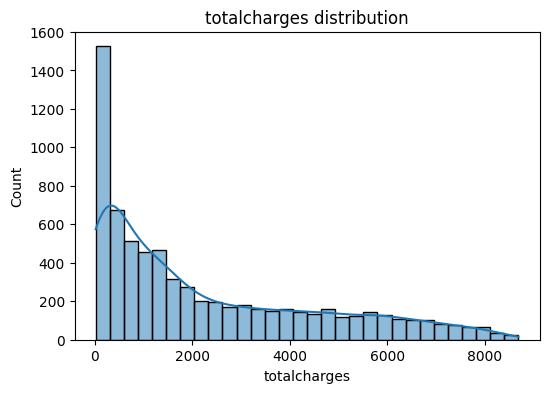

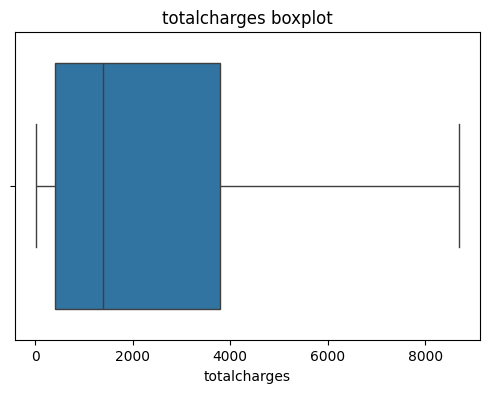

churn
No     5174
Yes    1869
Name: count, dtype: int64
churn
No     73.46
Yes    26.54
Name: count, dtype: float64


/tmp/ipython-input-3339150399.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="pastel")


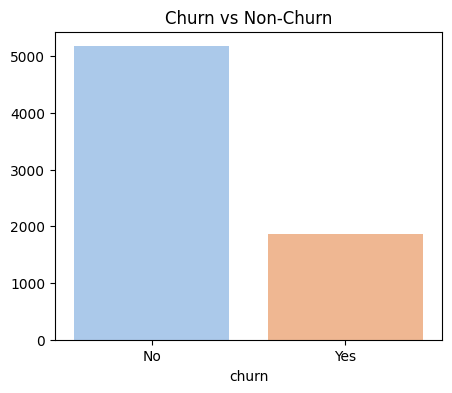

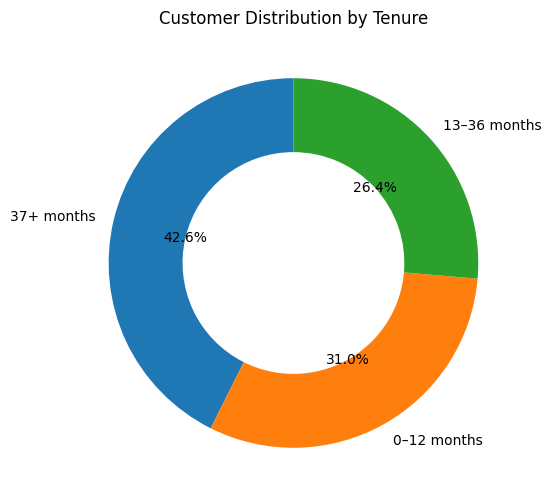

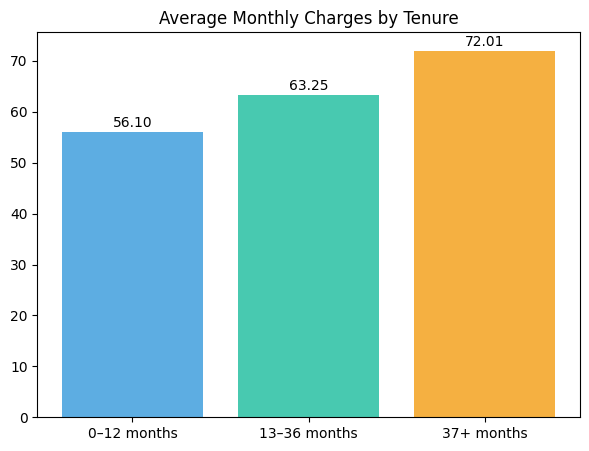

             monthlycharges                       totalcharges           \
                       mean median    min     max         mean   median   
tenure_group                                                              
0–12 months           56.10  55.90  18.75  112.95       282.26   174.55   
13–36 months          63.25  69.68  18.25  116.25      1513.54  1404.98   
37+ months            72.01  80.30  18.40  118.75      4213.72  4282.40   

                               
                 min      max  
tenure_group                   
0–12 months    18.80  1397.48  
13–36 months  218.55  4025.50  
37+ months    677.05  8684.80  


/tmp/ipython-input-3339150399.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure_group', y='totalcharges', data=df, estimator='mean', palette='pastel')


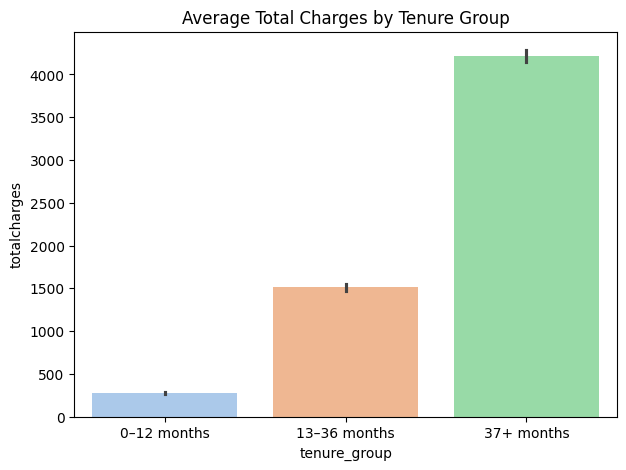

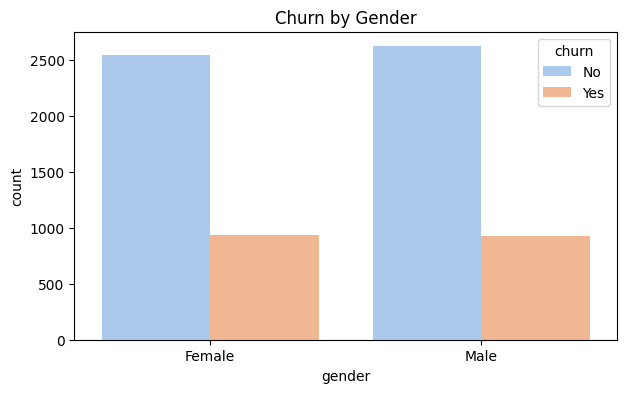

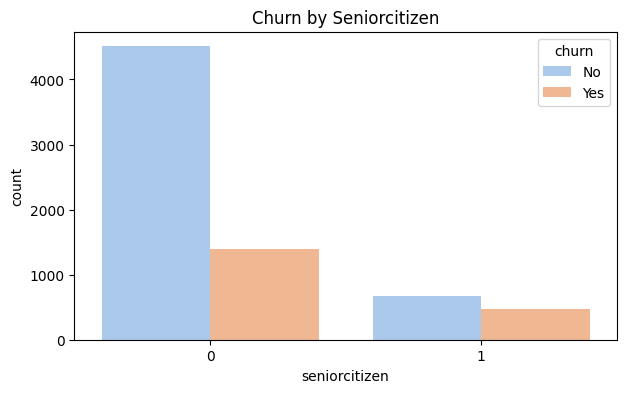

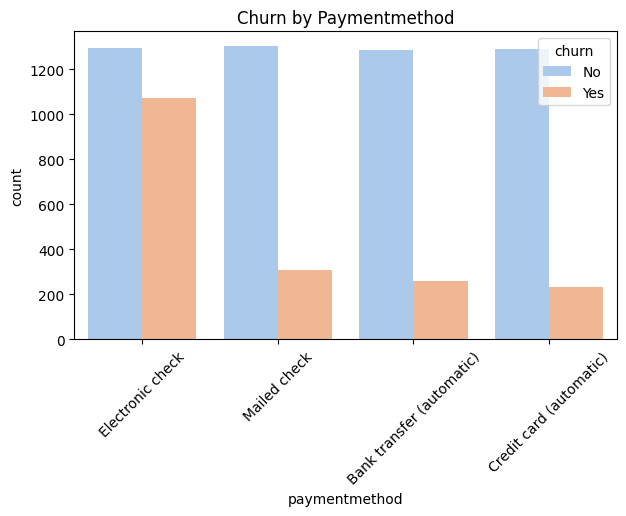

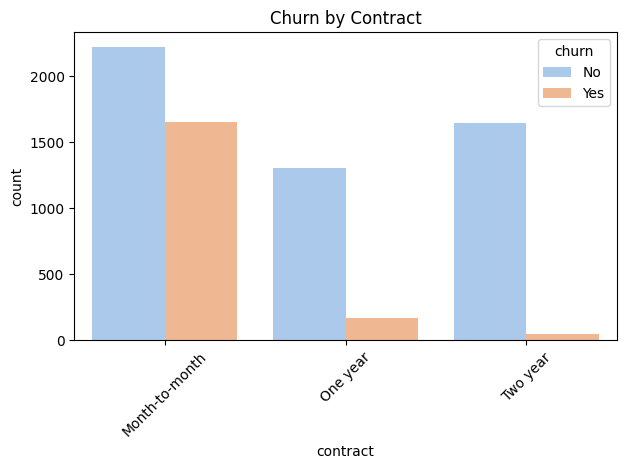

/tmp/ipython-input-3339150399.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_bin = df.groupby('tenure_bin')[churn_col].value_counts(normalize=True).unstack().fillna(0)


<Figure size 700x500 with 0 Axes>

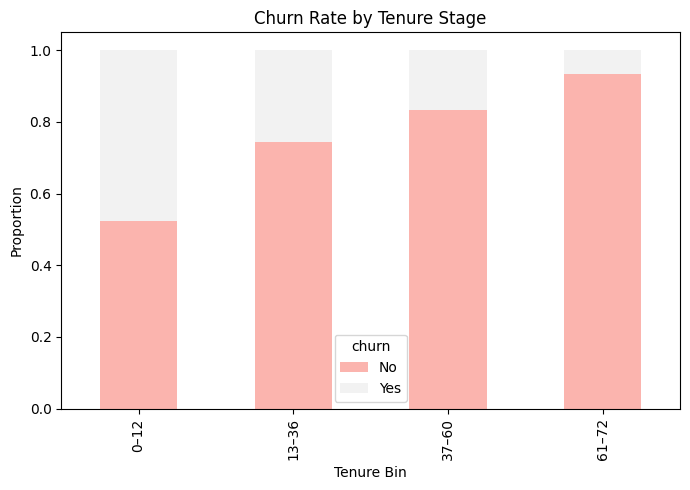

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = "/content/sample_data/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file_path)

print(df.head(10))
print(df.dtypes)
print(df.isnull().sum())

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].astype(str).str.replace(' ', ''), errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.fillna('Unknown', inplace=True)
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - df.shape[0]
print(f"Removed {removed_rows} duplicate rows.")

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())
print(df.info())
print(df.describe(include='all'))
print(df.mode().iloc[0])

os.makedirs("/content/plots", exist_ok=True)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} distribution")
    plt.savefig(f"/content/plots/{col}_hist.png")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    plt.savefig(f"/content/plots/{col}_box.png")
    plt.show()

churn_col = [c for c in df.columns if 'churn' in c.lower()]
if churn_col:
    churn_col = churn_col[0]
    counts = df[churn_col].value_counts()
    percent = counts / len(df) * 100
    print(counts)
    print(percent.round(2))

    plt.figure(figsize=(5,4))
    sns.barplot(x=counts.index, y=counts.values, palette="pastel")
    plt.title("Churn vs Non-Churn")
    plt.savefig("/content/plots/churn_bar.png")
    plt.show()

def tenure_group(months):
    if months <= 12: return '0–12 months'
    if months <= 36: return '13–36 months'
    return '37+ months'

if 'tenure' in df.columns:
    df['tenure_group'] = df['tenure'].apply(tenure_group)
else:
    df['tenure_group'] = 'Unknown'

tenure_counts = df['tenure_group'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('Customer Distribution by Tenure')
plt.savefig("/content/plots/tenure_pie.png")
plt.show()

if 'monthlycharges' in df.columns:
    avg_monthly = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()
    plt.figure(figsize=(7,5))
    bars = plt.bar(avg_monthly['tenure_group'], avg_monthly['monthlycharges'], color=['#5DADE2','#48C9B0','#F5B041'])
    plt.title('Average Monthly Charges by Tenure')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}", ha='center')
    plt.savefig("/content/plots/avg_monthly_charges.png")
    plt.show()

if 'tenure_group' in df.columns:
    summary_stats = df.groupby('tenure_group')[['monthlycharges','totalcharges']].agg(['mean','median','min','max']).round(2)
    print(summary_stats)
    plt.figure(figsize=(7,5))
    sns.barplot(x='tenure_group', y='totalcharges', data=df, estimator='mean', palette='pastel')
    plt.title('Average Total Charges by Tenure Group')
    plt.savefig("/content/plots/avg_total_charges.png")
    plt.show()

demo_cols = ['gender', 'seniorcitizen', 'paymentmethod', 'contract']
for col in demo_cols:
    if col in df.columns and churn_col:
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, hue=churn_col, data=df, palette='pastel')
        if col in ['paymentmethod','contract']:
            plt.xticks(rotation=45)
        plt.title(f'Churn by {col.capitalize()}')
        plt.savefig(f"/content/plots/churn_by_{col}.png")
        plt.show()

if 'tenure' in df.columns and churn_col:
    df['tenure_bin'] = pd.cut(df['tenure'], bins=[0,12,36,60,72], labels=['0–12','13–36','37–60','61–72'])
    churn_by_bin = df.groupby('tenure_bin')[churn_col].value_counts(normalize=True).unstack().fillna(0)
    plt.figure(figsize=(7,5))
    churn_by_bin.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7,5))
    plt.title("Churn Rate by Tenure Stage")
    plt.xlabel("Tenure Bin")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.savefig("/content/plots/churn_by_tenure.png")
    plt.show()
